**Bitcoin data analysis**

**OBBIETTIVI:**

**1-** Calcolare e analizzare la Volatilità di btc nel tempo e la sua utilità;

**2-** Analizzare il Volume di btc nel tempo e la sua utilità;

**3-** Analizzare il CPI rispetto a btc nel tempo e la sua utilità e callolare la correlazione tra i due.

In [1]:
pip install yfinance pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr


**EXTRACTION-TRASFORMATION & LOAD**

In [3]:
# Scarica i dati storici di Bitcoin (BTC-USD) da Yahoo Finance con yfinance
bitcoin_data = yf.download('BTC-USD', start='2010-01-01')
bitcoin_data = bitcoin_data[['Close', 'Volume']].copy() 
bitcoin_data.rename(columns={'Close': 'BTC_Price', 'Volume': 'BTC_Volume'}, inplace=True)

# Visualizza i primi dati
print(bitcoin_data.head())



[*********************100%%**********************]  1 of 1 completed

             BTC_Price  BTC_Volume
Date                              
2014-09-17  457.334015    21056800
2014-09-18  424.440002    34483200
2014-09-19  394.795990    37919700
2014-09-20  408.903992    36863600
2014-09-21  398.821014    26580100


In [4]:
# Funzione per ottenere i dati del CPI dalla FRED usando pandas_datareader
def get_cpi_data():
    cpi = pdr.DataReader('CPIAUCSL', 'fred', start='2010-01-01')
    return cpi

# Ottieni i dati del CPI
cpi_data = get_cpi_data()

# Visualizza i primi dati
print(cpi_data.head())


            CPIAUCSL
DATE                
2010-01-01   217.488
2010-02-01   217.281
2010-03-01   217.353
2010-04-01   217.403
2010-05-01   217.290


In [5]:
# Unione dei dati di Bitcoin e CPI
bitcoin_cpi_data = bitcoin_data.join(cpi_data, how='inner')

# Rimozione dei valori mancanti, se presenti
bitcoin_cpi_data.dropna(inplace=True)

# Visualizza i primi dati uniti
print(bitcoin_cpi_data.head())


             BTC_Price  BTC_Volume  CPIAUCSL
2014-10-01  383.614990    26229400   237.430
2014-11-01  325.748993    16677200   236.983
2014-12-01  379.244995    11763000   236.252
2015-01-01  314.248993     8036550   234.747
2015-02-01  226.972000    29128500   235.342


In [6]:
# Calcolo della volatilità giornaliera di Bitcoin
bitcoin_cpi_data['BTC_Daily_Return'] = bitcoin_cpi_data['BTC_Price'].pct_change()
bitcoin_cpi_data['BTC_Volatility'] = bitcoin_cpi_data['BTC_Daily_Return'].rolling(window=9).std() 

**GRAFICO VOLATILITA'/BTC**

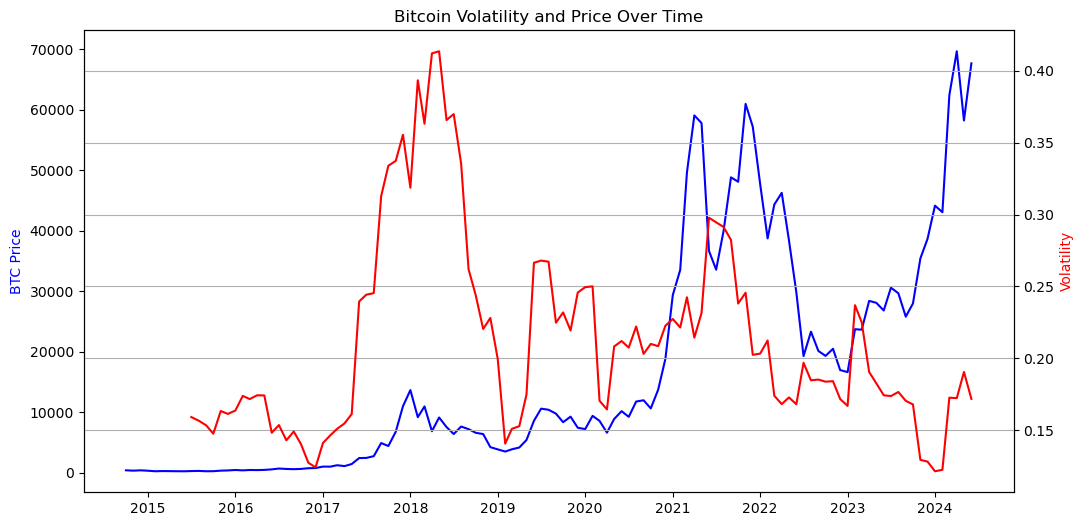

In [7]:
# Plot della volatilità e del prezzo di Bitcoin nel tempo
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_cpi_data.index, bitcoin_cpi_data['BTC_Price'], label='BTC Price', color='blue')
plt.ylabel('BTC Price', color='blue')
plt.twinx()
plt.plot(bitcoin_cpi_data.index, bitcoin_cpi_data['BTC_Volatility'], label='Volatility (9-Day Rolling Std)', color='red')
plt.ylabel('Volatility', color='red')
plt.title('Bitcoin Volatility and Price Over Time')
plt.xlabel('Date')
plt.grid(True)
plt.show()


**NEL GRAFICO N°1** SOVRASTANTE, SI PUO' OSSERVARE LA VOLATILITA' DI BITCOIN NELL'ARCO MOBILE UTILE A 9 GIORNI.
EVIDENZIANDO:

-COME NEI MOMENTI DI SALITA DEL PREZZO A MEDIO-LUNGO TERMINE ABBIA UN IMPORTANTE RISVOLTO SOLITAMENTE LA ROTTURA
DEL LIVELLO **Volatility(0.20)**; INNESCANDO MOVIMENTI DI AMMPIO RAGGIO NEI PREZZI SIA AL RIALZO CHE AL RIBASSO.

-A LUNGO TERMINE INVECE, NOTIAMO ANCHE COME LA VOLATILITA' GENERALMENTE SIA IN DIMINUZIONE E INVERSAMENTE CORRELATA AL PREZZO DI 
BITCOIN, DIMOSTRANDO COME L'ASSET NEL TEMPO STIA EFFETIVAMENTE ACQUISTANDO MAGGIORE STABILITA'

**GRAFICO VOLUME/BTC**

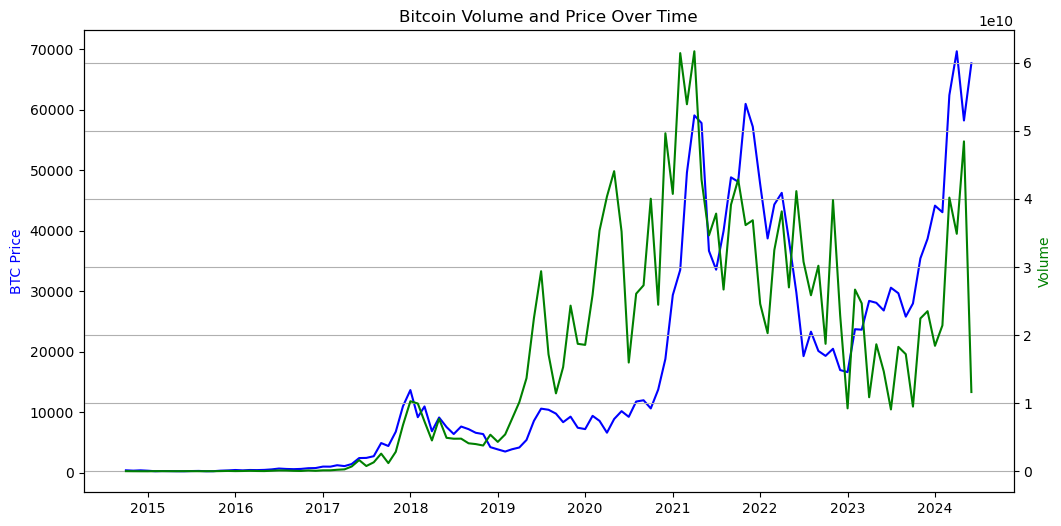

In [8]:
# Plot dei volumi e del prezzo di Bitcoin nel tempo
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_cpi_data.index, bitcoin_cpi_data['BTC_Price'], label='BTC Price', color='blue')
plt.ylabel('BTC Price', color='blue')
plt.twinx()
plt.plot(bitcoin_cpi_data.index, bitcoin_cpi_data['BTC_Volume'], label='Volume', color='green')
plt.ylabel('Volume', color='green')
plt.title('Bitcoin Volume and Price Over Time')
plt.xlabel('Date')
plt.grid(True)
plt.show()


**NEL GRAFICO N°2** QUI IN ALTO TROVIAMO INVECE **L'ANDAMENTO DEI VOLUMI SPOT(REALI) IN ENTRATA O USCITA** DALL'ASSET IN REALAZIONE AL PREZZO DI BITCOIN.
QUASI SEMPRE IL VOLUME E' UN ANTICIPATORE DEL PREZZO, DANDOCI IMPORTANTI INFORMAZIONI RIGUARDO LA SALUTE DEL TREND.

POSSIAMO OSSERVARE INFATTI COME NELL'ANNO 2019-2020 SI SIA MOSSO AL RIALZO MENTRE CHE IL PREZZO ANDAVA NELLA DIREZIONE OPPOSTA, SEGNALANDO COSI'
UNA DIVERGENZA CHE NEI 2 ANNI SUCCESSIVI HA PORTATO AD UNA ESPONENZIALE CRESCITA DEL PREZZO; AD EUGUAL MODO MA NEL VERSO OPPOSTO NEL 2021-2022 PREANNUNCIANDO L'ESAURIMENTO DEL TREND IN ATTO.

ALLA LUCE DI QUESTE INFORMAZIONI POSSIAMO IDENTIFICARE IN QUESTO TOOL UNA LINEA GUIDA PER CAPIRE SE IL MOVIMENTO DEI PREZZI E' SOSTENUTO
DA VOLUMI (SARA' UN MOVIMENTO CHE SI STA SVILUPPANDO); AL CONTRARIO INVECE SE I VOLUMI SI MUOVONO INVERSAMENTE AL PREZZO DI BTC (POSSIAMO ASPETTARCI CHE
IL MOVIMENTO DI TENDENZA SIA VICINO AL SUO COMPLETAMENTO E STIA PREPARANDO UN INVERSIONE)

-PER UNA MAGGIORE PRECISIONE NEL CALCOLO E' CONSIGLIABILE AGGIORNARLO SOLO ALL'INIZIO DI OGNI MESE

**GRAFICO CPI**

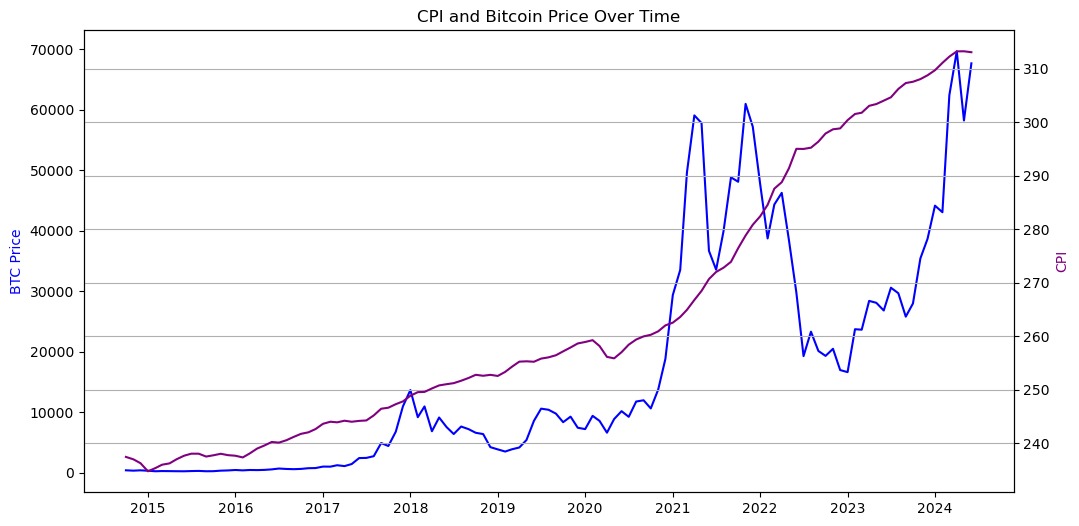

In [9]:
# Plot del CPI e del prezzo di Bitcoin nel tempo
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_cpi_data.index, bitcoin_cpi_data['BTC_Price'], label='BTC Price', color='blue')
plt.ylabel('BTC Price', color='blue')
plt.twinx()
plt.plot(bitcoin_cpi_data.index, bitcoin_cpi_data['CPIAUCSL'], label='CPI', color='purple')
plt.ylabel('CPI', color='purple')
plt.title('CPI and Bitcoin Price Over Time')
plt.xlabel('Date')
plt.grid(True)
plt.show()


**NEL GRAFICO N°3** POSSIAMO OSSERVARE L'ANDAMENTO DEL CPI IN RELAZIONE A BTC.

IL CPI SI BASA SU UN PANIERE CONTENENTE DIVERSE CATEGORIE DI PRODOTTI, DAI GENERI ALIMENTARI AI TRASPORTI.VIENE CALCOLATA COME MEDIA PONDERATA DELLA VARIAZIONE DEI PREZZI RISPETTO A UN ANNO BASE.

A PRIMO IMPATTO VEDIAMO COME NON SI RIESCE A TROVA UN UTILITA' CHE SIA EFFICENTE AD OCCHIO PER QUESTO DATO.
OLTRE CHE IN MOMENTI IN CUI LE ASPETTATIVE DEL CPI CALA/DISCORDANONO O SONO INFERIORI AL PREVISTON. CERTAMENTE HA UNA PARTICOLARE VALENZA PER LE ASPETTATIVE
SULLE POLITICHE DELLE BANCHE CENTRALI MA SENZA UN CONTESTO RISULTA DIFFICILE DA ANALIZZARE PER BTC.
DI CONSEGUENZA ANDREBBE INTEGRATO CON ALTRI DATI.

**CORRELAZIONE CPI-BTC:**

In [10]:
# Calcolo della correlazione tra i rendimenti giornalieri di Bitcoin e il CPI
correlation = bitcoin_cpi_data['BTC_Daily_Return'].corr(bitcoin_cpi_data['CPIAUCSL'])

print(f'Correlation between Bitcoin daily returns and CPI: {correlation}')


Correlation between Bitcoin daily returns and CPI: -0.067514675793468
